<a href="https://colab.research.google.com/github/teju3805/LLM/blob/main/Handwritten_Digit_Recognition(EXP1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
classifier = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

classifier.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

classifier.fit(x_train, y_train, epochs=5, batch_size=32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9109 - loss: 0.2897
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9863 - loss: 0.0434
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9915 - loss: 0.0265
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9935 - loss: 0.0223
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9957 - loss: 0.0134


In [ ]:
def predict_digit(image):
    image = cv2.resize(image, (28,28))
    image = image / 255.0
    image = image.reshape(1,28,28)

    prediction = classifier.predict(image)
    return np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Digit: 1


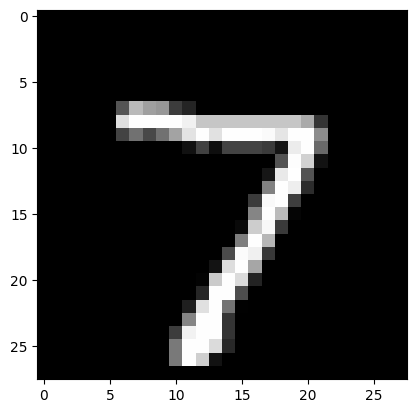

In [ ]:
plt.imshow(x_test[0], cmap='gray')
print("Predicted Digit:", predict_digit(x_test[0]))


In [ ]:
def generate_digit(num):
    indices = np.where(y_train == num)[0]
    img = x_train[np.random.choice(indices)]

    plt.imshow(img, cmap='gray')
    plt.title(f"Generated Digit: {num}")
    plt.axis('off')
    plt.show()


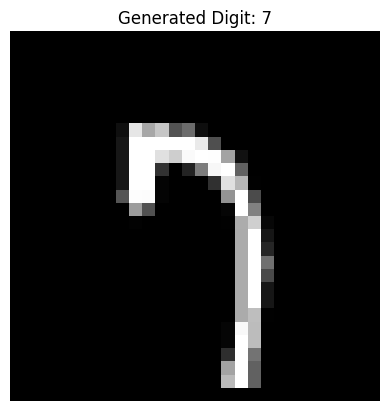

In [ ]:
generate_digit(7)


In [ ]:
def split_and_recognize(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)[1]

    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    digits = []

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 10 and h > 10:
            digit_img = img[y:y+h, x:x+w]
            digit_img = cv2.resize(digit_img, (28,28))
            digit_img = digit_img / 255.0
            digit_img = digit_img.reshape(1,28,28)

            pred = classifier.predict(digit_img)
            digits.append(np.argmax(pred))

    return digits


In [ ]:
result = split_and_recognize("two_digits.png")
print("Recognized Digits:", result)


Recognized Digits: []


In [ ]:
def main():
    print("\nHANDWRITTEN DIGIT RECOGNITION SYSTEM")
    print("1. Image → Digit")
    print("2. Digit → Image")
    print("3. Two-digit Image → Split & Recognize")

    choice = int(input("Enter your choice (1/2/3): "))

    if choice == 1:
        img_path = input("Enter image path: ")
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        print("Recognized Digit:", predict_digit(img))

    elif choice == 2:
        digit = int(input("Enter digit (0-9): "))
        generate_digit(digit)

    elif choice == 3:
        img_path = input("Enter two-digit image path: ")
        result = split_and_recognize(img_path)
        print("Recognized Digits:", result)

    else:
        print("Invalid choice")
